In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import pickle

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_pred.csv')

In [4]:
x=df.drop(columns='redemp')

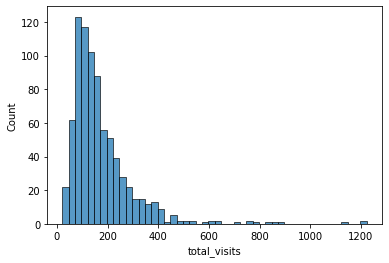

In [5]:
sns.histplot(df['total_visits'])

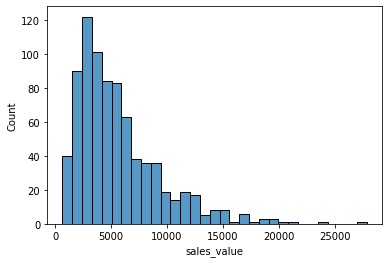

In [6]:
sns.histplot(df['sales_value'])

In [7]:
x=df.drop(columns='redemp')
y=df['redemp']

In [8]:
x.shape

(801, 19)

In [9]:
y.shape

(801,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=100)

In [11]:
mod=LogisticRegression(penalty='none').fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
y_pred=mod.predict(X_test)

In [13]:
y_test

484    1
218    0
589    0
724    1
359    0
      ..
774    0
279    1
632    0
534    0
104    0
Name: redemp, Length: 201, dtype: int64

In [14]:
confusion_matrix(y_test,y_pred)

array([[105,   9],
       [ 56,  31]])

In [15]:
recall_score(y_test,y_pred)

0.3563218390804598

In [16]:
#Since the numerical data looks like a skewed gaussian distribution, scaling to mean 0 and Sd 0 makes sense

sd=StandardScaler()

X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_train[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])
X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']]=sd.fit_transform(X_test[['total_visits','sales_value','age_desc','income_desc','kid_category_desc']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [68]:
sd=StandardScaler()
pipeline = Pipeline([('transformera', sd), ('estimator', LogisticRegression())])
estimator__solver = ['newton-cg', 'lbfgs', 'liblinear']
estimator__penalty = ['l2']
estimator__C = [100, 10, 1.0, 0.1, 0.01]
grid = dict(estimator__solver=estimator__solver,estimator__penalty=estimator__penalty,estimator__C=estimator__C)

In [18]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformera', 'estimator', 'transformera__copy', 'transformera__with_mean', 'transformera__with_std', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start'])

In [69]:
grid_search=GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [70]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.583249 using {'estimator__C': 0.01, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}


In [71]:
mod=LogisticRegression(penalty='l2',C=0.01,solver='liblinear').fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.7419354838709677

In [22]:
def naturalNumbers(n):
    return [i+1 for i in range(n)]

In [63]:
mod=DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
max_depth=naturalNumbers(10)
min_samples_leaf=naturalNumbers(5)
max_features=['auto','sqrt','None','log2']
grid=dict(criterion=criterion,splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [64]:
#cv=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [65]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.682456 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'splitter': 'random'}


In [66]:
mod=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 'auto', min_samples_leaf= 4, splitter= 'random')#,random_state=100)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.6923076923076923

In [67]:
pkl_filename = "decisiontree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [47]:
mod=RandomForestClassifier()
n_estimators = [10,25,50,75,100,200,250]
max_features = ['sqrt', 'log2']
criterion=['gini','entropy']
max_depth=[3,5,7,9]
#min_samples_leaf=naturalNumbers(15)
grid=dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features,n_estimators=n_estimators)

In [48]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.631220 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


In [ ]:
mod=RandomForestClassifier(criterion=grid_result.best_params_['criterion'],max_depth=grid_result.best_params_['max_depth'],max_features=grid_result.best_params_['max_features'],\
                           min_samples_leaf=grid_result.best_params_['min_samples_leaf'] , n_estimators=grid_result.best_params_['n_estimators']).fit(X_train,y_train)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

In [56]:
pkl_filename = "randomforest.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)

In [ ]:
#Gradient Boost

In [57]:
mod=GradientBoostingClassifier()
learning_rate = [0, 0.25, 0.5, 0.7, 0.9, 1.0]
max_depth = [3, 7, 9,11]
subsample = [0.5, 0.7, 1.0]
n_estimators = [10,25,50,75,100,150]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

In [58]:
#cv=StratifiedKFold(n_splits=4)
grid_search=GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=5, scoring='precision',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [59]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.575783 using {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 25, 'subsample': 0.5}


In [60]:
mod=GradientBoostingClassifier(learning_rate=grid_result.best_params_['learning_rate'],max_depth=grid_result.best_params_['max_depth'],\
                               n_estimators=grid_result.best_params_['n_estimators'],subsample=grid_result.best_params_['subsample']).fit(X_train,y_train)
mod.fit(X_train,y_train)
ypred=mod.predict(X_test)
precision_score(y_test,ypred)

0.6164383561643836

In [61]:
pkl_filename = "gradientboost.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mod, file)